Positive tweets percentage: 32.55813953488372 %
Negative tweets percentage: 16.27906976744186 %
Neutral tweets percentage: 51.16279069767442 %


Positive tweets:
RT @DrChubbyy: Lmao it’s like Lagos have already concluded their elections. https://t.co/KD1oxYWnhR
RT @IndiaToday: The party believes the village brings good omen for it to rule the country.

https://t.co/hDmcnemHaS
RT @CNNAfrica: Meet Muhammadu Buhari and Atiku Abubakar: the old men vying to lead Nigeria, Africa's youngest youth population https://t.co…
RT @NkirukaNistoran: Breaking: Fire guts smart card readers at INEC office in Anambra 

Barely four days to the Presidential and National A…
@citizentvkenya Elections were fair. Rao and his supporters should drop this crazy belief that it was stolen. How c… https://t.co/bIooY65xR1
RT @DrAMSinghvi: Amazing spin by spinmasters &amp;bloggers. Assuming wo accepting CAG report 1)is 9% of FM nailed or upheld by 2.86% of CAG? 2)…
RT @ScottPresler: I just mailed 47 more thank you let

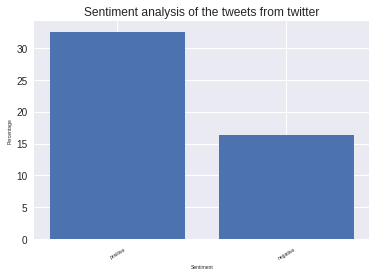

In [0]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
%matplotlib inline
class TwitterClient(object): 
	''' 
	Generic Twitter Class for sentiment analysis. 
	'''
	def __init__(self): 
		''' 
		Class constructor or initialization method. 
		'''
		# keys and tokens from the Twitter Dev Console 
		consumer_key = 'jtSZeXpnOytJLVw70V69fVqiz'
		consumer_secret = 'xUJ19jZMdIqF6DyDOshc2sbgWLERbYx7FyrCBXGfR1oUD8D1Pz'
		access_token = '1088080298946965504-FDTwov23YUHuCl5rBvjl5LfyCl0QxZ'
		access_token_secret = 'XqR8AZzlEof9O6R9BbmCuAt8Neh0A0J9FvdhJ5k48JB1W'

		# attempt authentication 
		try: 
			# create OAuthHandler object 
			self.auth = OAuthHandler(consumer_key, consumer_secret) 
			# set access token and secret 
			self.auth.set_access_token(access_token, access_token_secret) 
			# create tweepy API object to fetch tweets 
			self.api = tweepy.API(self.auth) 
		except: 
			print("Error: Authentication Failed") 

	def clean_tweet(self, tweet): 
		''' 
		Utility function to clean tweet text by removing links, special characters 
		using simple regex statements. 
		'''
		return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w +: \/\/\S +)", " ", tweet).split()) 

	def get_tweet_sentiment(self, tweet): 
		''' 
		Utility function to classify sentiment of passed tweet 
		using textblob's sentiment method 
		'''
		# create TextBlob object of passed tweet text 
		analysis = TextBlob(self.clean_tweet(tweet)) 
		# set sentiment 
		if analysis.sentiment.polarity > 0: 
			return 'positive'
		elif analysis.sentiment.polarity == 0: 
			return 'neutral'
		else: 
			return 'negative'

	def get_tweets(self, query, count = 10): 
		''' 
		Main function to fetch tweets and parse them. 
		'''
		# empty list to store parsed tweets 
		tweets = [] 

		try: 
			# call twitter api to fetch tweets 
			fetched_tweets = self.api.search(q = query, count = count) 

			# parsing tweets one by one 
			for tweet in fetched_tweets: 
				# empty dictionary to store required params of a tweet 
				parsed_tweet = {} 

				# saving text of tweet 
				parsed_tweet['text'] = tweet.text 
				# saving sentiment of tweet 
				parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 

				# appending parsed tweet to tweets list 
				if tweet.retweet_count > 0: 
					# if tweet has retweets, ensure that it is appended only once 
					if parsed_tweet not in tweets: 
						tweets.append(parsed_tweet) 
				else: 
					tweets.append(parsed_tweet) 

			# return parsed tweets 
			return tweets 

		except tweepy.TweepError as e: 
			# print error (if any) 
			print("Error : " + str(e)) 
def main(): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    # calling function to get tweets 
    tweets = api.get_tweets(query = 'Elections', count = 200) 
  
    # picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    pos_tweet_percent=100*len(ptweets)/len(tweets)
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets 
    neg_tweet_percent=100*len(ntweets)/len(tweets)
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} %".format((100*(len(tweets) - len(ntweets) - len(ptweets)))/len(tweets)))
    neutral_tweet_percent=100*(len(tweets))-pos_tweet_percent-neg_tweet_percent
    # printing first 5 positive tweets 
    print("\n\nPositive tweets:") 
    for tweet in ptweets[:10]: 
        print(tweet['text']) 
  
    # printing first 5 negative tweets 
    print("\n\nNegative tweets:") 
    for tweet in ntweets[:10]: 
        print(tweet['text'])
        
    #visualize
    import matplotlib.pyplot as plt
    import numpy as np
    # Data to plot
    labels = ['positive','negative']
    from matplotlib.ticker import FuncFormatter
    sizes = [pos_tweet_percent,neg_tweet_percent ]
    index = np.arange(2)
    plt.bar(index,sizes)
    plt.xlabel('Sentiment', fontsize=5)
    plt.ylabel('Percentage', fontsize=5)
    plt.xticks(index, labels, fontsize=5, rotation=30)
    plt.title('Sentiment analysis of the tweets from twitter')
    plt.show()
   

if __name__ == "__main__": 
	# calling main function 
	main() 
